In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn import metrics

In [49]:
data = pd.read_excel (r'C:\Users\Kira\Desktop\Internship\Data\Delhi_Data-20210529T043217Z-001\Delhi_Data\2013-2020-RK-PURAM-final-dataset\3y_weekly_RKPURAM.xlsx')
data['From Date']=pd.to_datetime(data['From Date'])
data['year'] = data['From Date'].dt.year
data['month'] = data['From Date'].dt.month
data['day'] = data['From Date'].dt.day

In [50]:
import datetime as dt

In [51]:
data['From Date']= data['From Date'].map(dt.datetime.toordinal)

In [52]:
df=data.loc['0':'207']

In [53]:
df.columns

Index(['From Date', 'PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'SO2y1', 'COy1', 'Ozoney1', 'RHy1', 'WSy1', 'WDy1', 'SRy1', 'BPy1',
       'ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'SO2y2',
       'COy2', 'Ozoney2', 'RHy2', 'WSy2', 'WDy2', 'SRy2', 'BPy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'SO2y3', 'COy3',
       'Ozoney3', 'RHy3', 'WSy3', 'WDy3', 'SRy3', 'BPy3', 'ATy3', 'PM2.5',
       'PM1', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'RH', 'WS',
       'WD', 'SR', 'BP', 'AT', 'year', 'month', 'day'],
      dtype='object')

In [54]:
X1 = df[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
Y1 = df['PM1']

In [55]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1,test_size=.2,random_state=4)

In [56]:
grad_boost = GradientBoostingRegressor(n_estimators=2000,
                                      max_depth=8,
                                      max_features=0.1,
                                      min_samples_split=4,
                                      min_samples_leaf=5,
                                      learning_rate=0.001)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(learning_rate=0.001, max_depth=8, max_features=0.1,
                          min_samples_leaf=5, min_samples_split=4,
                          n_estimators=2000)

In [57]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.8925990427724402

Score on test data: 0.7049544924501768

Root Mean Squared Error: 61.825158285134805

Overall model accuracy: 0.7049544924501768


In [58]:
test=data.loc['207':'259']
X=test[['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1',
       'COy1','ATy1', 'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2',
       'COy2','ATy2','PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3',
        'ATy3','year', 'month', 'day']]
X

,PM2.5y1,PM1y1,NOy1,NO2y1,NOxy1,NH3y1,COy1,ATy1,PM2.5y2,PM1y2,...,PM1y3,NOy3,NO2y3,NOxy3,NH3y3,COy3,ATy3,year,month,day
207,302.818571,428.861429,125.535714,76.847143,144.901429,32.607143,2.175714,8.394286,217.428571,371.975714,...,416.398571,100.627143,83.730000,212.015714,56.007143,2.998571,12.122857,2019,12,29
208,316.292857,456.537143,109.870000,52.067143,117.267143,29.011429,1.537714,8.800000,264.292857,452.655714,...,332.717143,98.832857,67.225714,194.864286,57.234286,3.004286,10.478571,2020,1,5
209,241.932857,349.680000,84.832857,58.215714,100.144286,31.015714,0.970000,11.971429,191.864286,344.172857,...,282.434286,101.944286,57.842857,190.755714,48.108571,2.867143,12.764286,2020,1,12
210,253.915714,405.144286,117.140000,58.545714,126.631429,28.408571,1.768000,9.905714,237.660000,405.398571,...,346.604286,94.412857,75.028571,195.770000,43.388571,2.740000,8.177143,2020,1,19
211,128.998571,223.215604,34.865714,44.648571,52.171429,23.565714,2.566000,10.632857,173.172857,302.185714,...,237.858571,49.015714,68.434286,127.910000,44.487143,1.844286,9.742857,2020,1,26
212,187.365714,225.330769,47.905714,49.550000,65.417143,23.558571,2.305429,9.834286,143.550000,284.925714,...,251.350000,74.012857,62.091429,156.391429,42.347143,2.127143,13.330000,2020,2,2
213,146.527143,198.920769,65.595714,50.381429,80.275714,22.507143,1.334286,11.920000,193.068571,331.052857,...,328.171429,153.021429,66.960000,268.622857,39.584286,2.754286,13.437143,2020,2,9
214,193.267143,333.581429,73.142857,72.708571,98.288571,27.225714,1.971429,13.324286,109.957143,204.577143,...,279.338571,50.672857,67.874286,129.678571,30.340000,1.890000,13.547143,2020,2,16
215,110.288571,192.155714,68.825714,73.708571,96.087143,27.742857,1.424286,15.858571,166.732857,330.682857,...,275.608571,34.234286,82.401429,120.168571,37.265714,1.715714,16.775714,2020,2,23
216,108.875000,172.547857,86.743571,88.330000,117.698571,27.334286,1.810714,12.517143,109.975714,228.510000,...,280.377143,38.925714,62.438571,108.778571,26.370000,1.704286,17.097143,2020,3,1


In [59]:
predict=grad_boost.predict(X)

In [60]:
predict

array([346.37553622, 310.28515183, 291.75367561, 320.89356952,
       286.53095359, 249.90944898, 274.68997015, 236.12697766,
       280.56019117, 250.46875421, 234.76642741, 226.36409971,
       211.29147308, 238.95536581, 217.52204475, 204.68109561,
       240.65592179, 255.52107065, 209.48613088, 261.35539992,
       227.3718013 , 250.34349295, 232.92066394, 205.54439992,
       211.11034257, 229.80115732, 186.71948226, 182.49633334,
       165.80688532, 133.42568991, 121.88353126, 148.81293168,
       131.40133676, 134.29112465, 122.75287304, 122.49046892,
       131.03029816, 131.68961451, 134.17536738, 173.18909446,
       216.10125425, 262.91947927, 278.37761493, 277.17305447,
       274.25517568, 274.42848336, 335.33752633, 288.4027904 ,
       287.54191475, 329.02930498, 294.75672942, 312.56936733,
       321.97826051])

In [61]:
dates=data.loc['207':'259','From Date']

In [62]:
X['From Date']=dates.values

In [63]:
X.columns

Index(['PM2.5y1', 'PM1y1', 'NOy1', 'NO2y1', 'NOxy1', 'NH3y1', 'COy1', 'ATy1',
       'PM2.5y2', 'PM1y2', 'NOy2', 'NO2y2', 'NOxy2', 'NH3y2', 'COy2', 'ATy2',
       'PM2.5y3', 'PM1y3', 'NOy3', 'NO2y3', 'NOxy3', 'NH3y3', 'COy3', 'ATy3',
       'year', 'month', 'day', 'From Date'],
      dtype='object')

In [64]:
X['From Date']= X['From Date'].map(dt.datetime.fromordinal)

In [65]:
test['From Date']= test['From Date'].map(dt.datetime.fromordinal)

In [66]:
test = test.set_index(['From Date'])
X = X.set_index(['From Date'])


In [67]:
X['pred']=predict

<AxesSubplot:xlabel='From Date'>

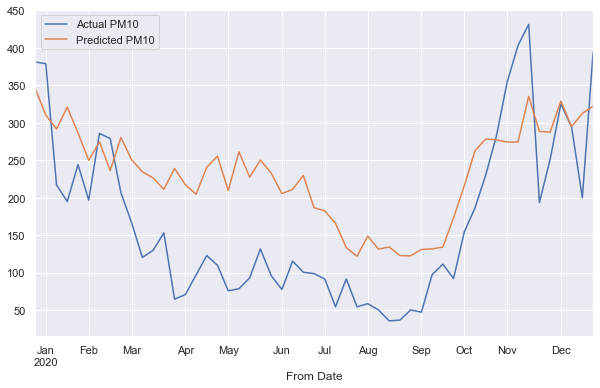

In [68]:
test['PM1'].plot(legend=True, label='Actual PM10', figsize=(10,6))
X['pred'].plot(legend=True, label='Predicted PM10')

In [69]:
np.sqrt(mean_squared_error(test['PM1'],X['pred']))

94.63460093470235

In [70]:
mae = metrics.mean_absolute_error(ytest, gboost_pred)
mse = metrics.mean_squared_error(ytest, gboost_pred)
rmsetest = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(ytest,gboost_pred)

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmsetest)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 47.48157881138905
MSE: 3822.350196981973
RMSE: 61.825158285134805
R-Squared: 0.7049544924501768


In [71]:
mae = metrics.mean_absolute_error(test['PM1'],X['pred'])
mse = metrics.mean_squared_error(test['PM1'],X['pred'])
rmse = np.sqrt(mse) # or mse**(0.5)  
r2 = metrics.r2_score(test['PM1'],X['pred'])

print("Results of sklearn.metrics:")
print("MAE:",mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics:
MAE: 84.87020436716163
MSE: 8955.707694070366
RMSE: 94.63460093470235
R-Squared: 0.2447528631102026


In [72]:
import pickle
filename = 'PM10_gboost3y.sav'
pickle.dump(grad_boost, open(filename, 'wb'))

In [73]:
#load model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(xtest, ytest)
print(result)

0.7049544924501768


# 3rd plot

In [74]:
testcase = pd.DataFrame()

In [75]:
testcase['test']=ytest
testcase['pred']=gboost_pred

In [76]:
testcase["Corrected"] = np.where(testcase["pred"]<testcase["test"],testcase["pred"]+rmsetest ,
                   np.where(testcase["pred"]>testcase["test"], testcase["pred"]-rmsetest,
                            testcase["pred"]))

In [77]:
testcase

,test,pred,Corrected
33,103.254286,117.633525,55.808366
176,167.354286,248.837033,187.011875
105,344.172857,349.678936,287.853778
18,267.381786,300.672999,238.847841
90,127.725714,152.121616,90.296457
1,497.675714,341.851265,403.676423
187,61.948571,140.606972,78.781814
89,138.811429,178.085672,116.260513
191,112.964286,121.157127,59.331969
81,81.110000,139.829066,78.003907


In [78]:
'''testcase['test'].plot(legend=True, label='Actual PM2.5', figsize=(10,6))
testcase['pred'].plot(legend=True, label='Predicted PM2.5')
testcase["Corrected"].plot(legend=True, label='Corrected PM2.5')'''

'testcase[\'test\'].plot(legend=True, label=\'Actual PM2.5\', figsize=(10,6))\ntestcase[\'pred\'].plot(legend=True, label=\'Predicted PM2.5\')\ntestcase["Corrected"].plot(legend=True, label=\'Corrected PM2.5\')'

In [79]:
r2 = metrics.r2_score(testcase["Corrected"],testcase['test'])
r2

0.8466328408811159

In [80]:
test2020=pd.DataFrame()

In [81]:
test2020['test']=test['PM1']
test2020['pred']=X['pred']

In [82]:
test2020.index=test.index

In [83]:
test2020["Corrected"] = np.where(test2020["pred"]<test2020["test"],test2020["pred"]+rmsetest ,
                   np.where(test2020["pred"]>test2020["test"], test2020["pred"]-rmsetest,
                            test2020["pred"]))

<AxesSubplot:xlabel='From Date'>

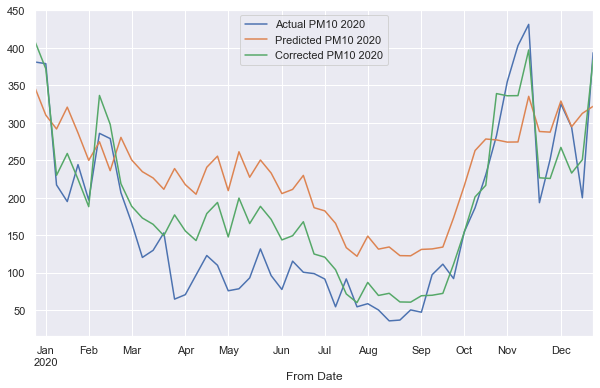

In [84]:
test2020['test'].plot(legend=True, label='Actual PM10 2020', figsize=(10,6))
test2020['pred'].plot(legend=True, label='Predicted PM10 2020')
test2020["Corrected"].plot(legend=True, label='Corrected PM10 2020')

In [85]:
r2020 = metrics.r2_score(test2020["Corrected"],test2020['test'])
r2020

0.7402507648703103